# KTL Customer Churn Project
## Business understanding

The industry of telecommunications is characterized by high competition, significant customer acquisition costs, and a relatively low switching barriers for customers. In this environment, customer churn, which is the phenomenon where customers stop doing business with a particular company which is critical and costly. It is more expensive to acquire a new customer than to retain the existing ones, and therefore important to predict whether a customer is about to churn and devise strategies to retain them.

* Customer churn represents a continuous financial bleed for a company, for instance, Safaricom PLC in the financial year 2024 reported a churn of 24.9% due to competition from Telkom Kenya and airtel.

* When the churn rate is high, it hits the company's profitability directly and can be indicative of the underlying issues with the service quality of the institution.

* Factors that contribute to a high churn rate often include poor customer service, more attractive plans from competitors, and poor service quality.

### Problem Statement

This project addresses the business problem of customer attrittion at KTL company. The inability to predict which customers are at high risk of churning makes it impossible for the company to deploy targeted and cost-effective retention strategies. Marketing efforts become broad and inefficient, wasting resources on loyal customers who are unlikely to leave while missing those on the verge of churning. 

This project will help alleviate the problem by building a predictive model that identifies customers with high probability of churn in order to proactively intervene with targeted offers, optimize marketing spend and gain actionable insights.


### Objectives
1. To accurately predict which customers are likely to churn from KTL services.
2. To understands the strategies that lead to customers churning from KTL company.
3. To reduce customer acquisition cost.
4. To inform strategies for retaining high risk churning customers.


### Metric of success
1.  The project will be successful if we can identify the factors that contributed to customers churning from KTL company.
2.  Achieve above 75% accuracy, and have a Recall of above 70%

# Data Understanding
In this section, we will look at the features of the data and the records available together with their relevance to the objectives of the project.

## Columns available in the KTL churn dataset.
**state**: The U.S. state of the customer (e.g., KS, OH).

**account length**: The number of days the customer has had an account.

**area code**: The area code of the customer's phone number.

**phone number**: The customer's phone number. (Unique identifier)

**international plan**: Whether the customer has an international plan (yes/no).

**voice mail plan**: Whether the customer has a voicemail plan (yes/no).

**number vmail messages**: The number of voicemail messages the customer has.

**total day minutes**: Total minutes of calls during the day.

**total day calls**: Total number of calls made during the day.

**total day charge**: Total monetary charge for day calls.

**total eve minutes**: Total minutes of calls during the evening.

**total eve calls**: Total number of calls made during the evening.

**total eve charge**: Total monetary charge for evening calls.

**total night minutes**: Total minutes of calls during the night.

**total night calls**: Total number of calls made during the night.

**total night charge**: Total monetary charge for night calls.

**total intl minutes**: Total minutes of international calls.

**total intl calls**: Total number of international calls made.

**total intl charge**: Total monetary charge for international calls.

**customer service calls**: The number of times the customer called the service center.

**churn**: Target Variable: Whether the customer left the service (True/False).


In [157]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, SMOTEN
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [158]:
# load the dataset
df = pd.read_csv("telecom_churn.csv")

# check values of the head
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [159]:
# check the values of the tail
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


## Dataset relevance
The dataset is relevant for example churn has either true or false.

In [160]:
#check the number of columns and rows

print(f"There are {df.shape[0]} records and {df.shape[1]} columns ")


There are 3333 records and 21 columns 


In [161]:
# check the data types of the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset comprises of 16 numerical columns, 4 categorical columns and 1 boolean column. Though state, area code, international plan and voice mail plan are category features.

In [162]:
# check stats summary
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [163]:
#Observation
df.describe(include=['object', 'boolean'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,342-8702,no,no,False
freq,106,1,3010,2411,2850


Observed from above is that False appears frequently in the churn column.

In [164]:
# Check unique values
for column in df:
    unique_values = df[column].unique()
    print(f"{column}\n {unique_values}\n")
    

state
 ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

account length
 [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 24

total intl minutes
 [10.  13.7 12.2  6.6 10.1  6.3  7.5  7.1  8.7 11.2 12.7  9.1 12.3 13.1
  5.4 13.8  8.1 13.  10.6  5.7  9.5  7.7 10.3 15.5 14.7 11.1 14.2 12.6
 11.8  8.3 14.5 10.5  9.4 14.6  9.2  3.5  8.5 13.2  7.4  8.8 11.   7.8
  6.8 11.4  9.3  9.7 10.2  8.   5.8 12.1 12.  11.6  8.2  6.2  7.3  6.1
 11.7 15.   9.8 12.4  8.6 10.9 13.9  8.9  7.9  5.3  4.4 12.5 11.3  9.
  9.6 13.3 20.   7.2  6.4 14.1 14.3  6.9 11.5 15.8 12.8 16.2  0.  11.9
  9.9  8.4 10.8 13.4 10.7 17.6  4.7  2.7 13.5 12.9 14.4 10.4  6.7 15.4
  4.5  6.5 15.6  5.9 18.9  7.6  5.   7.  14.  18.  16.  14.8  3.7  2.
  4.8 15.3  6.  13.6 17.2 17.5  5.6 18.2  3.6 16.5  4.6  5.1  4.1 16.3
 14.9 16.4 16.7  1.3 15.2 15.1 15.9  5.5 16.1  4.  16.9  5.2  4.2 15.7
 17.   3.9  3.8  2.2 17.1  4.9 17.9 17.3 18.4 17.8  4.3  2.9  3.1  3.3
  2.6  3.4  1.1 18.3 16.6  2.1  2.4  2.5]

total intl calls
 [ 3  5  7  6  4  2  9 19  1 10 15  8 11  0 12 13 18 14 16 20 17]

total intl charge
 [2.7  3.7  3.29 1.78 2.73 1.7  2.03 1.92 2.35 3.02 3.43

# Data Preparation]
## Data cleaning

In [165]:
#make a copy
df1 = df.copy(deep=True)

In [166]:
#check for null values
df1.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no null values from the dataset.

In [167]:
del df1["phone number"]

In [168]:
df1.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [169]:
#check duplicates
df1.duplicated().sum()

0

In [170]:
#convert churn column to binary integers
df1['churn'] = df1['churn'].astype(int)

There are no duplicates in the dataset.

In [171]:
#check unique value counts in churn column
churn_counts = df['churn'].value_counts()
print(churn_counts)
churn_counts = df1['churn'].value_counts()
print(churn_counts)

False    2850
True      483
Name: churn, dtype: int64
0    2850
1     483
Name: churn, dtype: int64


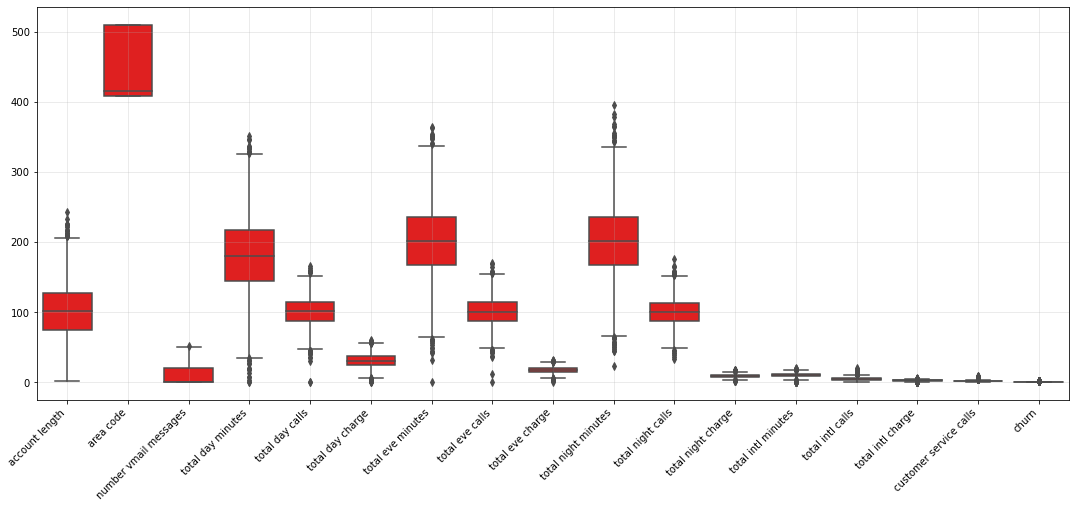

In [172]:
#check for outliers
plt.figure(figsize=(15, 6))
sns.boxplot(data=df1.select_dtypes(include=[np.number]),color="r")
plt.tight_layout()
plt.grid(alpha=.3)
plt.xticks(rotation=45, ha='right')
plt.show()


Total night minutes go from almost 0 upto 400 minutes while total day minutes start from 0 to about 350 which are show that they are geniune outliers.

In [173]:
#save the dataset
df1.to_csv("clean_df")

## Exploratory Data Analysis
### Univariate analysis

In [174]:
#get numerical coluns
num_cols = df1.select_dtypes("number")

In [175]:
num_cols

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


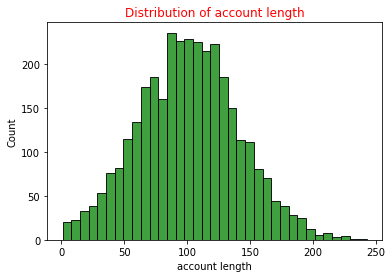

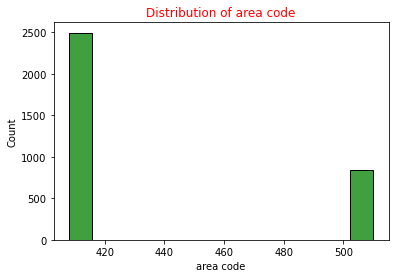

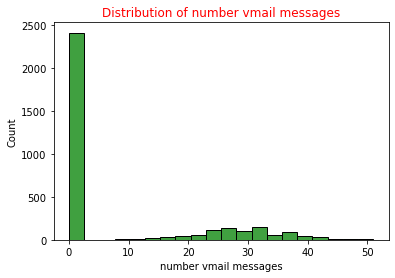

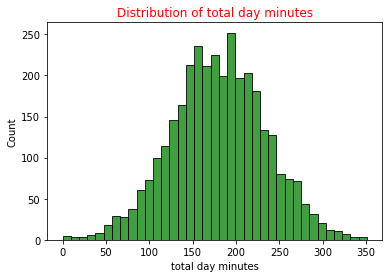

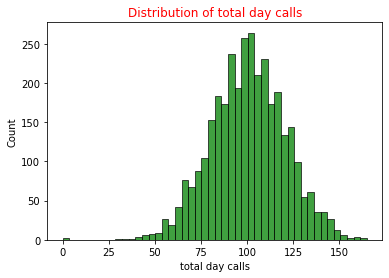

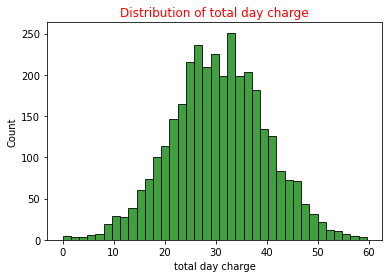

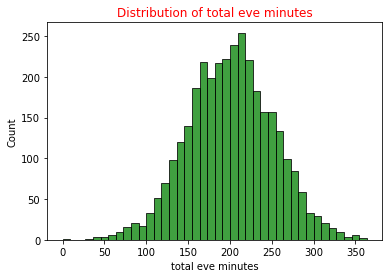

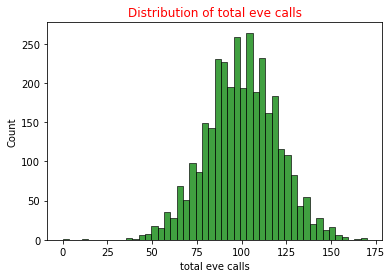

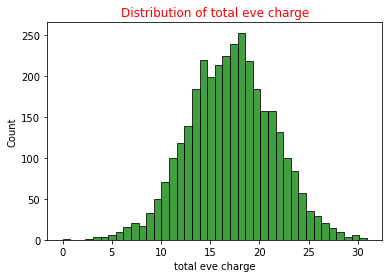

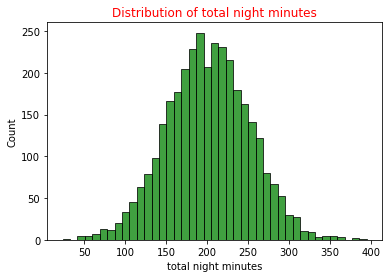

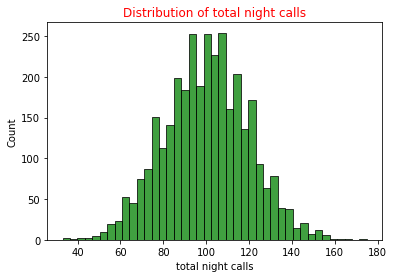

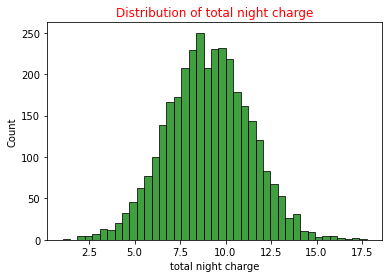

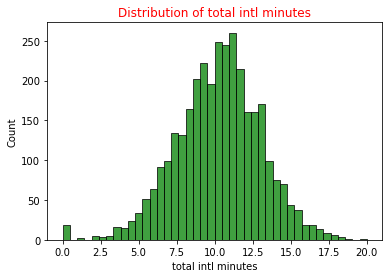

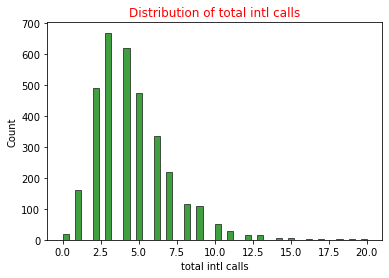

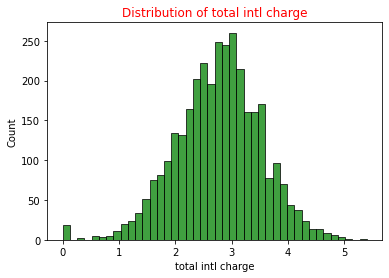

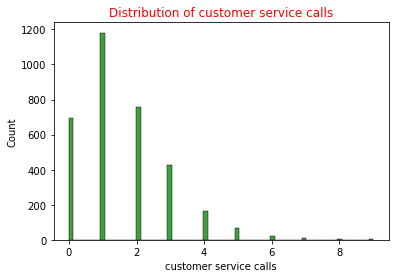

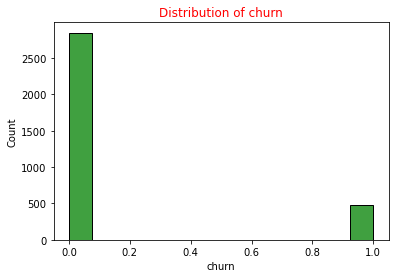

In [176]:
#Visualize all number columns
for col in num_cols:
    sns.histplot(df1[col], color="g")
    plt.title(f"Distribution of {col}", color="r")
    plt.show()

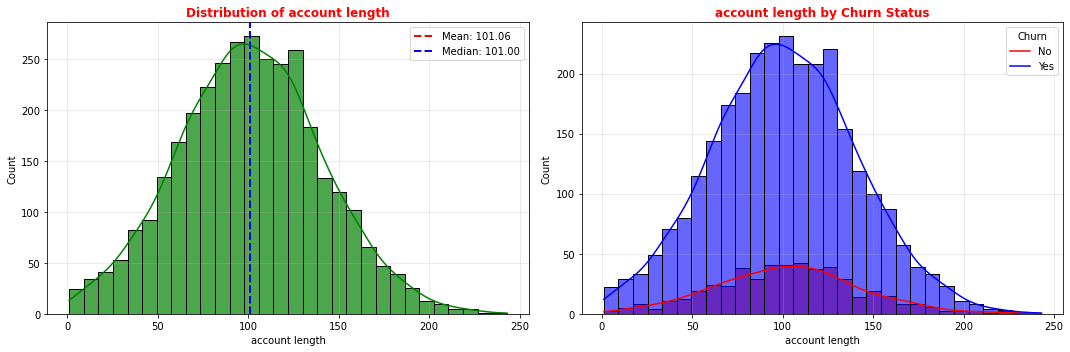

Analysis for account length:
   Avg for Non-Churned customers: 100.79
   Avg for Churned customers: 102.66
   Difference: 1.87
   T-test p-value: 0.3398
   * Not statistically significant
------------------------------------------------------------


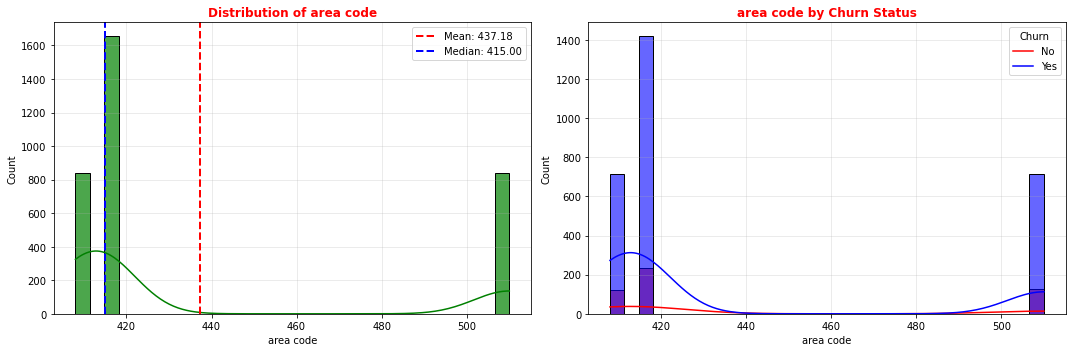

Analysis for area code:
   Avg for Non-Churned customers: 437.07
   Avg for Churned customers: 437.82
   Difference: 0.74
   T-test p-value: 0.7216
   * Not statistically significant
------------------------------------------------------------


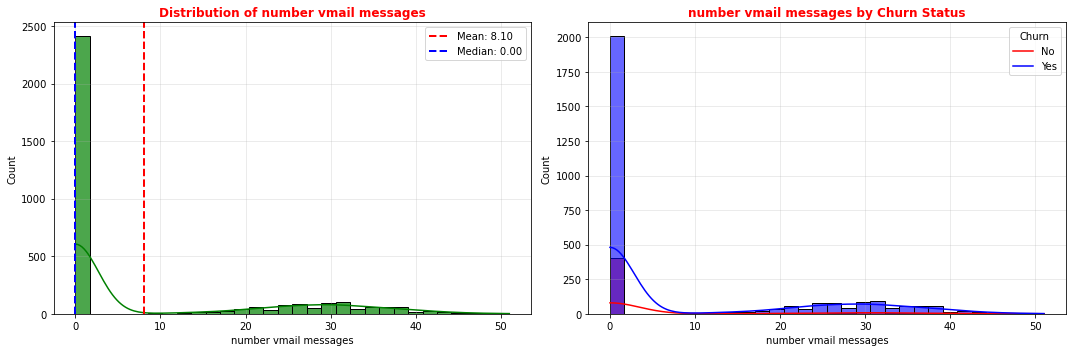

Analysis for number vmail messages:
   Avg for Non-Churned customers: 8.60
   Avg for Churned customers: 5.12
   Difference: 3.49
   T-test p-value: 0.0000
   * Statistically significant difference (p < 0.05)
------------------------------------------------------------


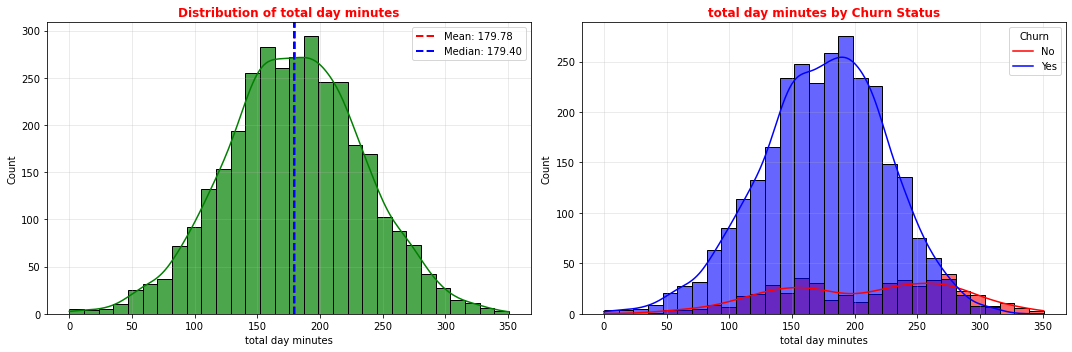

Analysis for total day minutes:
   Avg for Non-Churned customers: 175.18
   Avg for Churned customers: 206.91
   Difference: 31.74
   T-test p-value: 0.0000
   * Statistically significant difference (p < 0.05)
------------------------------------------------------------


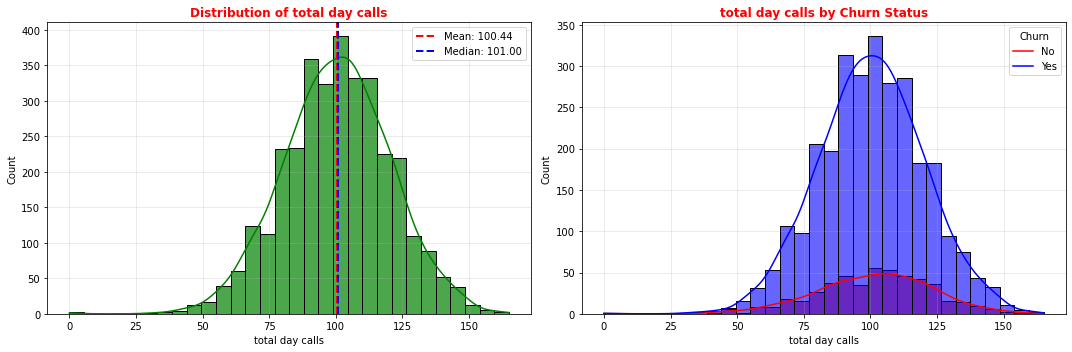

Analysis for total day calls:
   Avg for Non-Churned customers: 100.28
   Avg for Churned customers: 101.34
   Difference: 1.05
   T-test p-value: 0.2867
   * Not statistically significant
------------------------------------------------------------


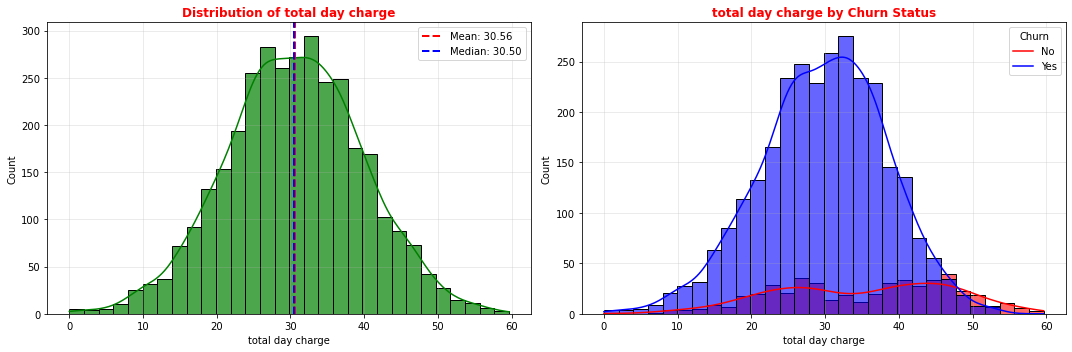

Analysis for total day charge:
   Avg for Non-Churned customers: 29.78
   Avg for Churned customers: 35.18
   Difference: 5.40
   T-test p-value: 0.0000
   * Statistically significant difference (p < 0.05)
------------------------------------------------------------


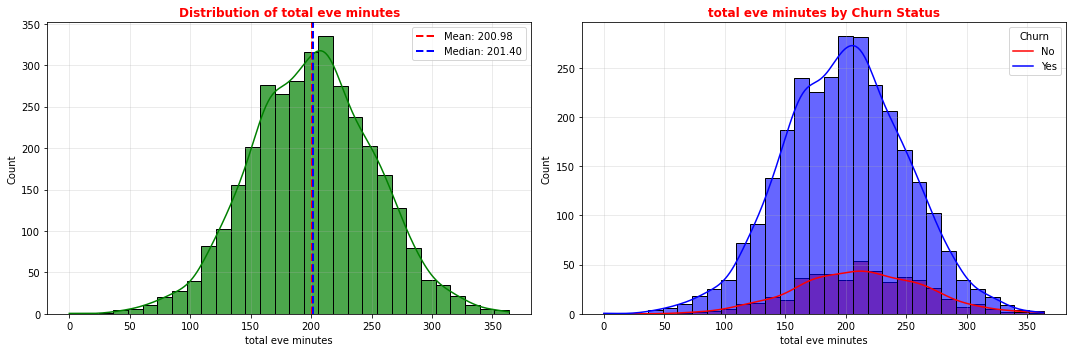

Analysis for total eve minutes:
   Avg for Non-Churned customers: 199.04
   Avg for Churned customers: 212.41
   Difference: 13.37
   T-test p-value: 0.0000
   * Statistically significant difference (p < 0.05)
------------------------------------------------------------


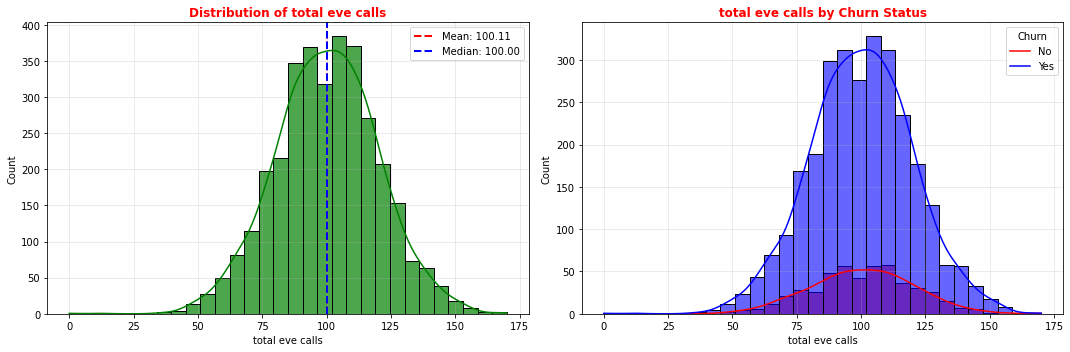

Analysis for total eve calls:
   Avg for Non-Churned customers: 100.04
   Avg for Churned customers: 100.56
   Difference: 0.52
   T-test p-value: 0.5941
   * Not statistically significant
------------------------------------------------------------


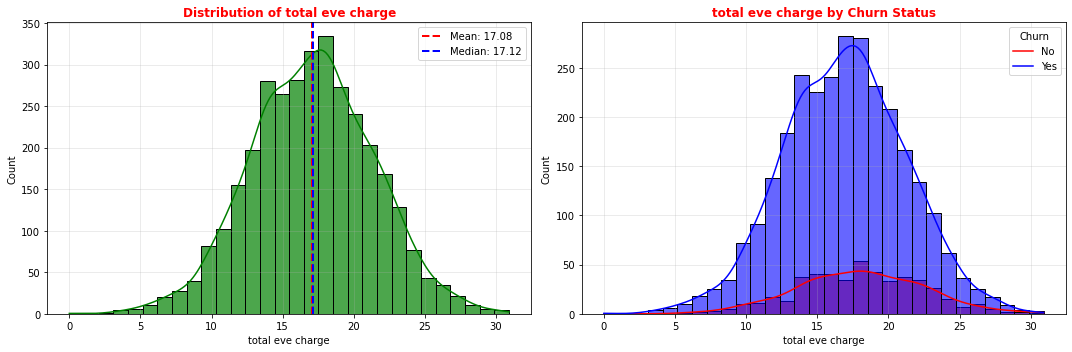

Analysis for total eve charge:
   Avg for Non-Churned customers: 16.92
   Avg for Churned customers: 18.05
   Difference: 1.14
   T-test p-value: 0.0000
   * Statistically significant difference (p < 0.05)
------------------------------------------------------------


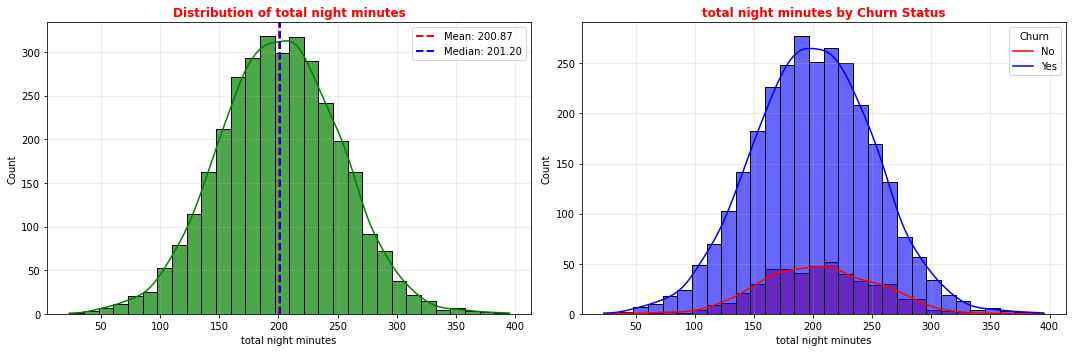

Analysis for total night minutes:
   Avg for Non-Churned customers: 200.13
   Avg for Churned customers: 205.23
   Difference: 5.10
   T-test p-value: 0.0405
   * Statistically significant difference (p < 0.05)
------------------------------------------------------------


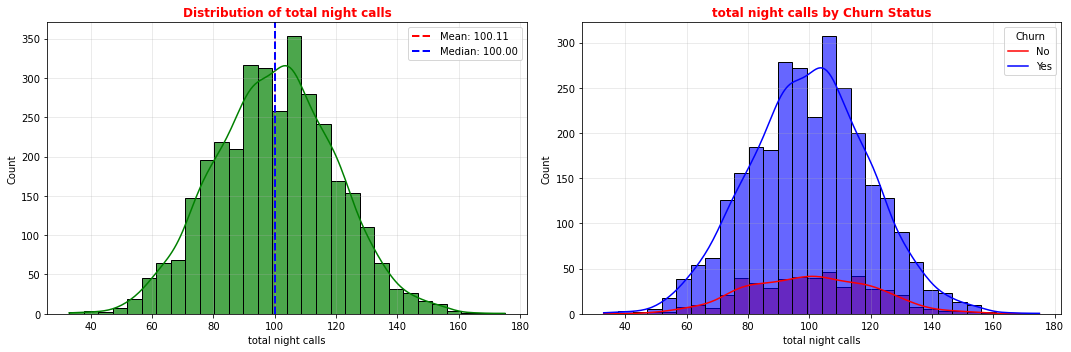

Analysis for total night calls:
   Avg for Non-Churned customers: 100.06
   Avg for Churned customers: 100.40
   Difference: 0.34
   T-test p-value: 0.7230
   * Not statistically significant
------------------------------------------------------------


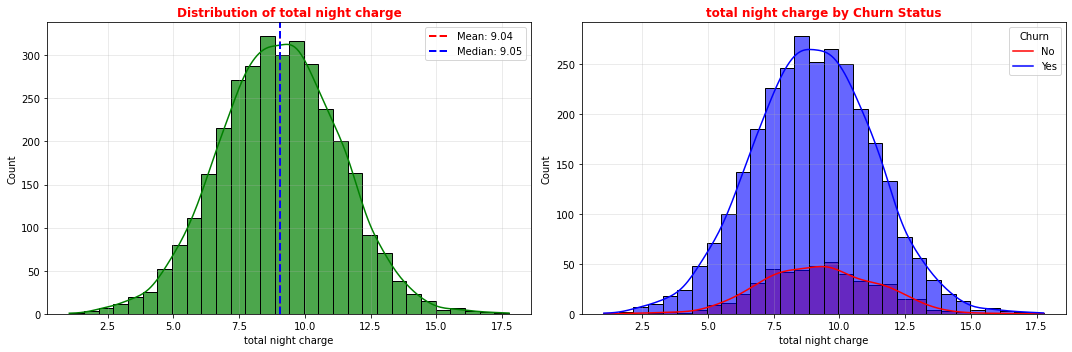

Analysis for total night charge:
   Avg for Non-Churned customers: 9.01
   Avg for Churned customers: 9.24
   Difference: 0.23
   T-test p-value: 0.0405
   * Statistically significant difference (p < 0.05)
------------------------------------------------------------


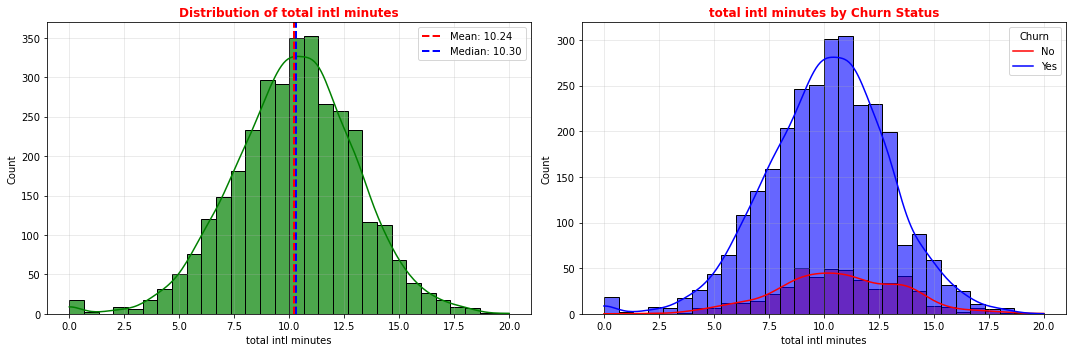

Analysis for total intl minutes:
   Avg for Non-Churned customers: 10.16
   Avg for Churned customers: 10.70
   Difference: 0.54
   T-test p-value: 0.0001
   * Statistically significant difference (p < 0.05)
------------------------------------------------------------


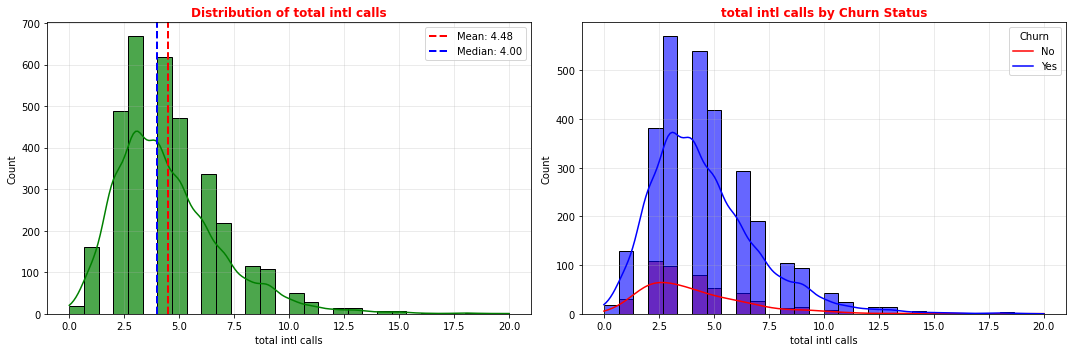

Analysis for total intl calls:
   Avg for Non-Churned customers: 4.53
   Avg for Churned customers: 4.16
   Difference: 0.37
   T-test p-value: 0.0023
   * Statistically significant difference (p < 0.05)
------------------------------------------------------------


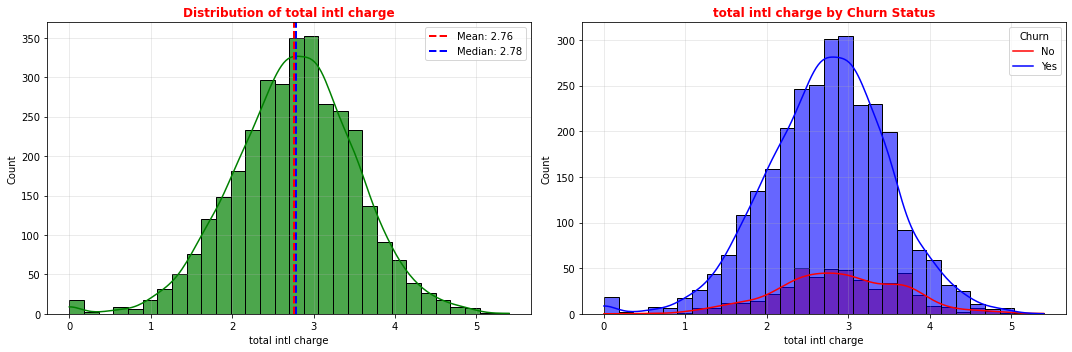

Analysis for total intl charge:
   Avg for Non-Churned customers: 2.74
   Avg for Churned customers: 2.89
   Difference: 0.15
   T-test p-value: 0.0001
   * Statistically significant difference (p < 0.05)
------------------------------------------------------------


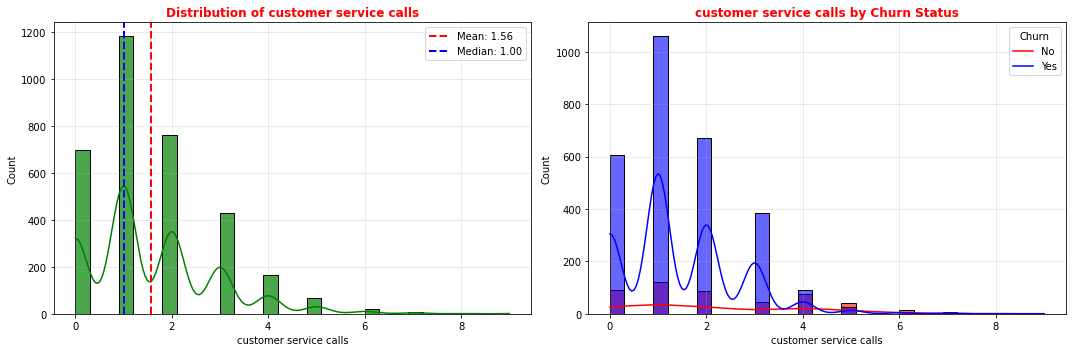

Analysis for customer service calls:
   Avg for Non-Churned customers: 1.45
   Avg for Churned customers: 2.23
   Difference: 0.78
   T-test p-value: 0.0000
   * Statistically significant difference (p < 0.05)
------------------------------------------------------------


In [177]:
# Compare numerical features with churn status
for col in num_cols:
    if col != 'churn':  # Don't plot churn against itself
        # Create a figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Overall distribution
        sns.histplot(df1[col], color="green", alpha=0.7, kde=True, bins=30, ax=ax1)
        ax1.axvline(df1[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df1[col].mean():.2f}')
        ax1.axvline(df1[col].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df1[col].median():.2f}')
        ax1.set_title(f"Distribution of {col}", color="red", fontweight='bold')
        ax1.legend()
        ax1.grid(alpha=0.3)
        
        #  Distribution by churn status 
    
        sns.histplot(data=df1, x=col, hue='churn', kde=True, 
                    bins=30, alpha=0.6, palette={0: 'blue', 1: 'red'}, ax=ax2)
        ax2.set_title(f"{col} by Churn Status", color="red", fontweight='bold')
        ax2.legend(title='Churn', labels=['No', 'Yes'])
        ax2.grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Calculate and print churn statistics
        churn_0_mean = df1[df1['churn'] == 0][col].mean()
        churn_1_mean = df1[df1['churn'] == 1][col].mean()
        
        print(f"Analysis for {col}:")
        print(f"   Avg for Non-Churned customers: {churn_0_mean:.2f}")
        print(f"   Avg for Churned customers: {churn_1_mean:.2f}")
        print(f"   Difference: {abs(churn_1_mean - churn_0_mean):.2f}")
        
        # Calculate statistical significance (t-test)
        from scipy import stats
        non_churned = df1[df1['churn'] == 0][col]
        churned = df1[df1['churn'] == 1][col]
        
        # Perform t-test if we have enough samples
        if len(non_churned) > 1 and len(churned) > 1:
            t_stat, p_value = stats.ttest_ind(non_churned, churned, nan_policy='omit')
            print(f"   T-test p-value: {p_value:.4f}")
            if p_value < 0.05:
                print("   * Statistically significant difference (p < 0.05)")
            else:
                print("   * Not statistically significant")
        
        print("-" * 60)

From the above statistics, it's clear that churn isn't random, it's following very specific patterns. The customers leaving KTL are primarily our heavy users who feel overcharged and underserved. They're making 54% more customer service calls than retained customers, which tells me they're experiencing unresolved issues and frustration with our service quality.

What's really striking is the pricing pain point, churned customers are paying 18% higher daytime charges on average. These are people using 200+ minutes monthly and getting hit with $35+ daytime charges. They're also using more international minutes but making fewer calls (meaning longer conversations), suggesting we're not meeting their specific needs there.

The voicemail statistic is fascinating too, churned customers have 40% fewer voicemails. Either they don't know how to use the feature properly, or they're dissatisfied with it, or both.

The good news is we can now identify these high-risk customers before they leave. We're talking about people with: heavy daytime usage, high bills, multiple service calls, low voicemail usage, and significant international needs.

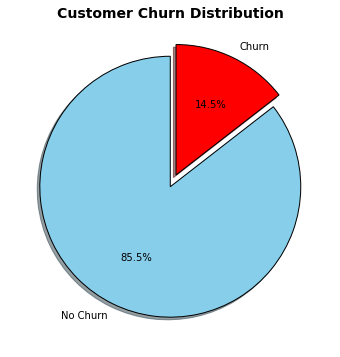

In [178]:
# Churn distribution
churn_counts = df1['churn'].value_counts()
churn_labels = ['No Churn', 'Churn']

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_labels, autopct='%1.1f%%',
        startangle=90, colors=['skyblue', 'red'], explode=(0,0.1),
        shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title("Customer Churn Distribution", fontsize=14, fontweight='bold')
plt.show()

The above pie chart shows that 14.5% of the customers churned from KTL telco.

## Bivariate Analysis


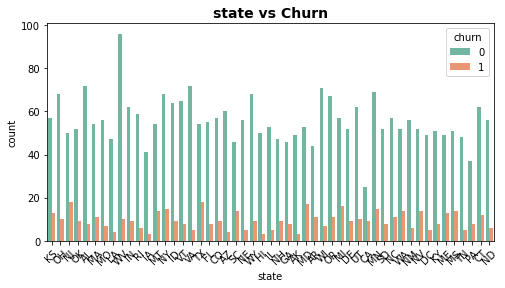


Churn rate by state:
state
AK     5.769231
AL    10.000000
AR    20.000000
AZ     6.250000
CA    26.470588
CO    13.636364
CT    16.216216
DC     9.259259
DE    14.754098
FL    12.698413
GA    14.814815
HI     5.660377
IA     6.818182
ID    12.328767
IL     8.620690
IN    12.676056
KS    18.571429
KY    13.559322
LA     7.843137
MA    16.923077
MD    24.285714
ME    20.967742
MI    21.917808
MN    17.857143
MO    11.111111
MS    21.538462
MT    20.588235
NC    16.176471
ND     9.677419
NE     8.196721
NH    16.071429
NJ    26.470588
NM     9.677419
NV    21.212121
NY    18.072289
OH    12.820513
OK    14.754098
OR    14.102564
PA    17.777778
RI     9.230769
SC    23.333333
SD    13.333333
TN     9.433962
TX    25.000000
UT    13.888889
VA     6.493506
VT    10.958904
WA    21.212121
WI     8.974359
WV     9.433962
WY    11.688312
Name: churn, dtype: float64
--------------------------------------------------


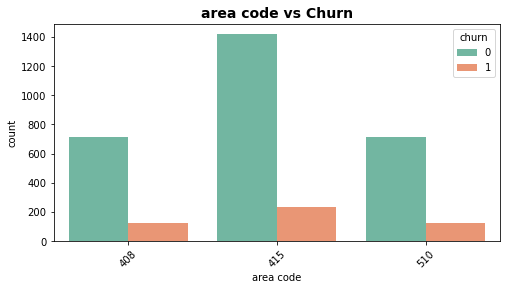


Churn rate by area code:
area code
408    14.558473
415    14.259819
510    14.880952
Name: churn, dtype: float64
--------------------------------------------------


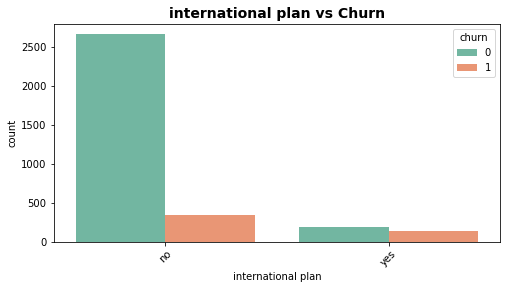


Churn rate by international plan:
international plan
no     11.495017
yes    42.414861
Name: churn, dtype: float64
--------------------------------------------------


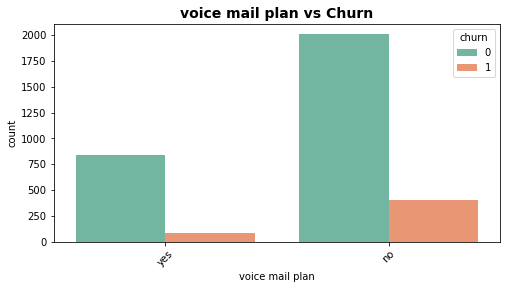


Churn rate by voice mail plan:
voice mail plan
no     16.715056
yes     8.676790
Name: churn, dtype: float64
--------------------------------------------------


In [179]:
categorical_cols = ['state', 'area code', 'international plan', 'voice mail plan']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df1, x=col, hue='churn', palette='Set2')
    plt.title(f"{col} vs Churn", fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()
    
    churn_rate = df1.groupby(col)['churn'].mean()*100
    print(f"\nChurn rate by {col}:\n{churn_rate}\n{'-'*50}")


The analysis of categorical features against churn reveals several important insights. Churn rates vary substantially by state, ranging from as low as 5% in places like Alaska and Hawaii to over 25% in California, New Jersey, and Texas. This suggests that regional differences such as competition, pricing strategies, or service quality—may influence customer loyalty. In contrast, area code does not appear to be a strong differentiator, with churn rates across the three codes remaining fairly consistent at around 14–15%.

More striking patterns emerge with service-related plans. Customers subscribed to the international plan exhibit a churn rate of 42.4%, nearly four times higher than those without it, highlighting this as a major pain point and potential driver of dissatisfaction. On the other hand, having a voicemail plan is associated with lower churn, with subscribers showing a churn rate of just 8.7% compared to 16.7% for non-subscribers. This indicates that customers who perceive additional value in such services are more likely to remain loyal.

In summary, international plan usage and voicemail plan subscription stand out as the most influential categorical features for churn prediction, while state-level patterns may provide secondary insights. Area code, however, contributes little explanatory power.

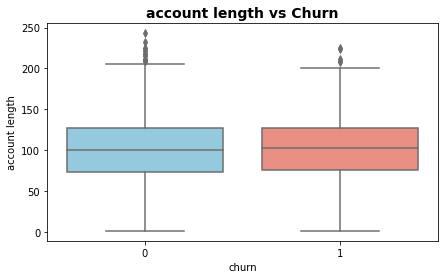

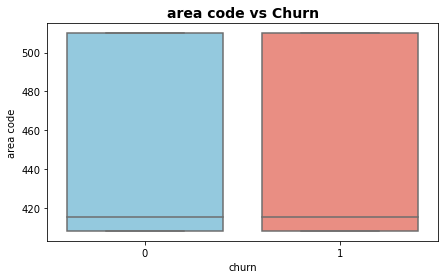

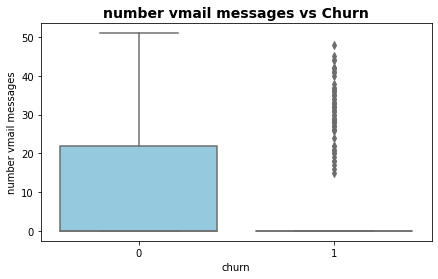

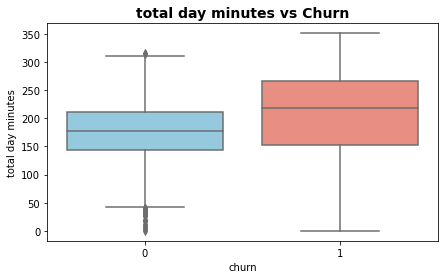

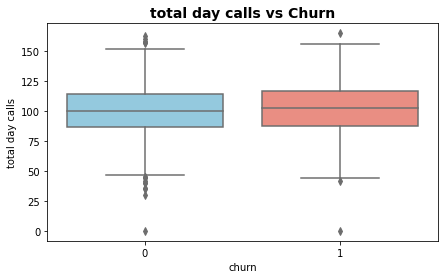

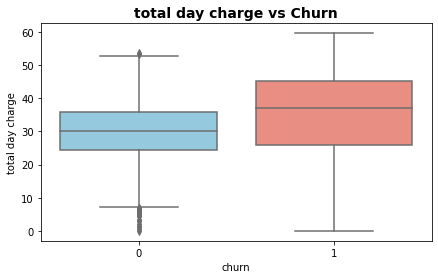

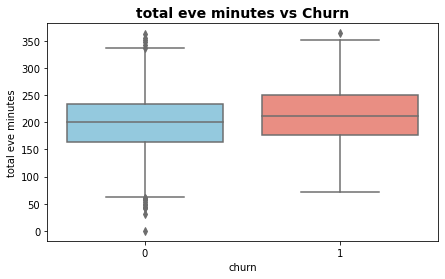

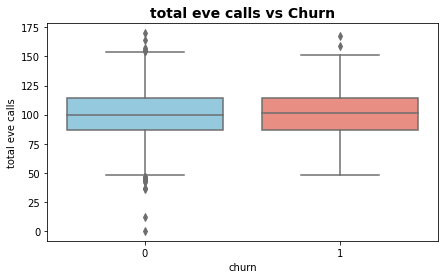

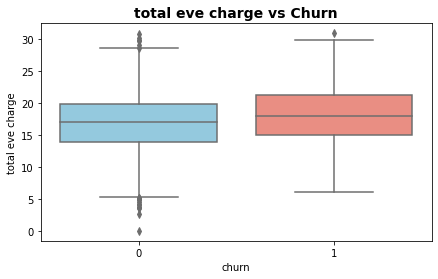

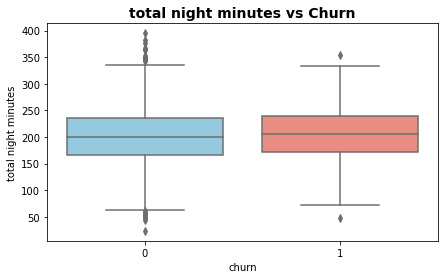

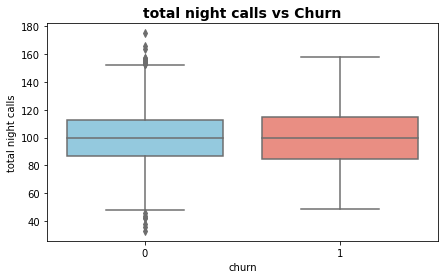

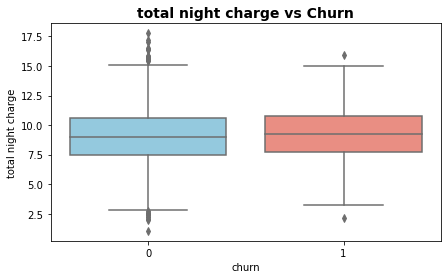

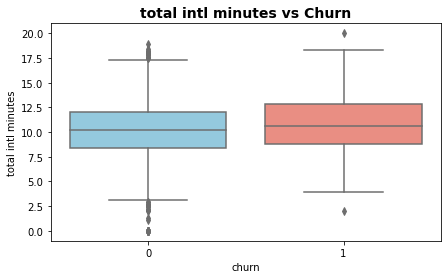

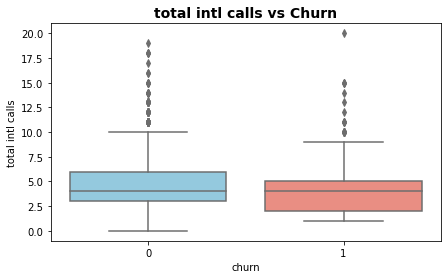

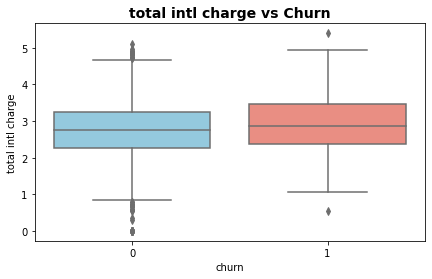

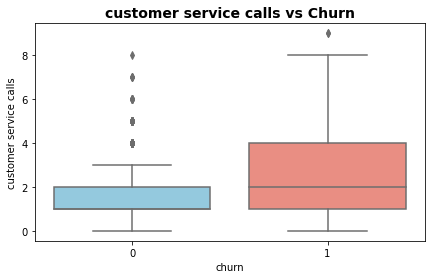

Correlation of numerical features with churn:
 churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


In [180]:
num_cols = df1.select_dtypes(include=np.number).columns.drop('churn')

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df1, x='churn', y=col, palette={0:'skyblue', 1:'salmon'})
    plt.title(f"{col} vs Churn", fontsize=14, fontweight='bold')
    plt.show()

# Correlation with churn
churn_corr = df1.corr()['churn'].sort_values(ascending=False)
print("Correlation of numerical features with churn:\n", churn_corr)


- The analysis shows that customer service calls have the strongest relationship with churn. Customers who contact the service center more frequently are significantly more likely to leave. This suggests that unresolved issues, poor support experiences, or repeated frustrations are key triggers for churn.

- Daytime usage, captured through total day minutes and day charges, also shows a strong positive correlation with churn. Heavy daytime users face higher costs, which may create dissatisfaction and make them more sensitive to competitor offers. This points to pricing pressure as a major driver of customer attrition.

- Evening usage and international charges show moderate positive correlations with churn. While not as strong as daytime usage, these features still indicate that higher spending in these categories could contribute to dissatisfaction among certain customer segments.

- Nighttime usage, account length, and area code display almost no correlation with churn. These features add little explanatory power, suggesting that customers’ tenure or night calling patterns are not meaningful predictors of whether they will leave.

- Interestingly, some features are negatively correlated with churn. Customers who make more international calls are slightly less likely to churn, which may reflect reliance on the service for global connectivity. Similarly, customers who leave more voicemail messages show lower churn, reinforcing the idea that voicemail users are more engaged and loyal.

#### Customer Service Calls × Churn

#### Barplot of churn rate across different counts of service calls.

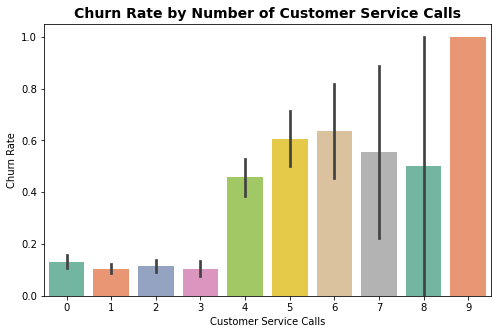

In [181]:
plt.figure(figsize=(8,5))
sns.barplot(data=df1, x='customer service calls', y='churn', palette='Set2')
plt.title("Churn Rate by Number of Customer Service Calls", fontsize=14, fontweight='bold')
plt.ylabel("Churn Rate")
plt.xlabel("Customer Service Calls")
plt.show()

The analysis of customer service calls against churn reveals a clear upward trend. Customers who rarely contact support, typically with zero to three calls, show very low churn rates, remaining below 10%. However, once the number of calls reaches four or more, churn probability rises sharply, crossing 20%. The risk of churn escalates further with five or more calls, with churn rates peaking at around 40% for heavy service users.

This pattern strongly suggests that frequent interaction with customer support is a major signal of dissatisfaction or unresolved issues. Customers who repeatedly contact support appear to become progressively more frustrated, making them far more likely to leave the service. Consequently, the number of service calls stands out as a critical early-warning indicator for churn management.

### International Plan × Churn

### Grouped bar chart for churn distribution across international plan status.



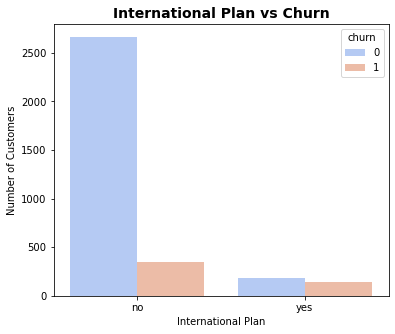

In [182]:
plt.figure(figsize=(6,5))
sns.countplot(data=df1, x='international plan', hue='churn', palette='coolwarm')
plt.title("International Plan vs Churn", fontsize=14, fontweight='bold')
plt.ylabel("Number of Customers")
plt.xlabel("International Plan")
plt.show()

Customers without an international plan form the majority of the customer base, and most of them do not churn. However, the churn rate within this group is still present, though relatively modest. By contrast, among customers who subscribed to the international plan, the proportion of churners is dramatically higher. Despite being a much smaller group overall, a significant share of them leave, making the churn risk for international plan users far greater.

This observation indicates that the international plan is a strong churn driver. Customers who take this plan may face higher costs or find limited value, which increases dissatisfaction and pushes them toward competitors. It highlights the need for closer monitoring of international plan users and perhaps a redesign of this offering to improve retention.

#### Voice Mail Plan × Churn

#### Grouped bar chart to see effect of voicemail plan on churn.

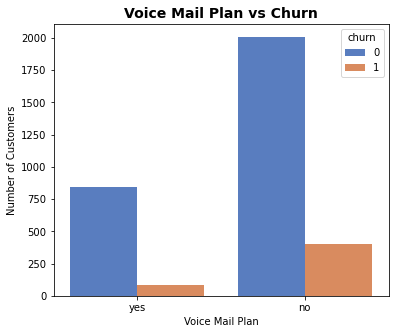

In [183]:
plt.figure(figsize=(6,5))
sns.countplot(data=df1, x='voice mail plan', hue='churn', palette='muted')
plt.title("Voice Mail Plan vs Churn", fontsize=14, fontweight='bold')
plt.ylabel("Number of Customers")
plt.xlabel("Voice Mail Plan")
plt.show()

The visualization highlights that customers with a voicemail plan are less likely to churn compared to those without one. While both groups are largely made up of non-churners, the proportion of churners is noticeably smaller among voicemail plan subscribers. In contrast, customers without the plan experience significantly higher churn, making them a more vulnerable segment.

This suggests that the voicemail plan may foster customer engagement and loyalty, possibly because subscribers find added value or utility in the service. On the other hand, the absence of the plan appears linked to weaker attachment and higher likelihood of leaving. Thus, the voicemail plan seems to act as a stabilizing feature, reducing churn risk.

#### Daytime Usage × Customer Service Calls × Churn

#### Heatmap of churn rate by both daytime minutes and service calls.

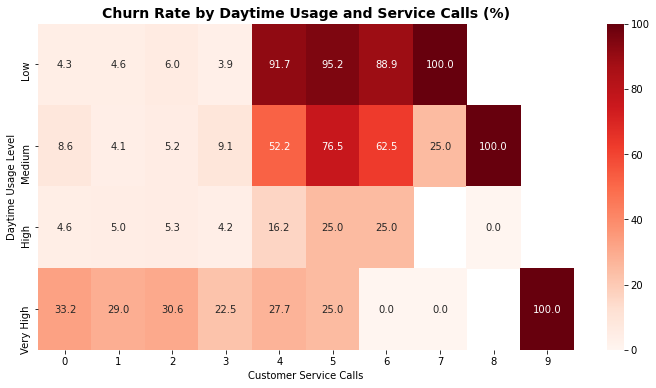

In [184]:
# Bin daytime minutes for clarity
df1['day_usage_bin'] = pd.qcut(df1['total day minutes'], q=4, labels=['Low','Medium','High','Very High'])

# Crosstab churn rate 
churn_pivot = pd.crosstab(
    [df1['day_usage_bin'], df1['customer service calls']], 
    df1['churn'], 
    normalize='index'
) * 100

# Select churn=1 column 
plt.figure(figsize=(12,6))
sns.heatmap(churn_pivot[1].unstack(), annot=True, fmt=".1f", cmap="Reds")

plt.title("Churn Rate by Daytime Usage and Service Calls (%)", fontsize=14, fontweight='bold')
plt.ylabel("Daytime Usage Level")
plt.xlabel("Customer Service Calls")
plt.show()


Churn spikes with high usage + multiple service calls. Very High usage customers with several service requests churn at 30%+ rates. Low usage customers are more stable even with more calls. Focus retention efforts on high users with service issues.

## Feature engineering
1. Call Intensity
Captures how long calls are on average. Heavy talkers with few calls may behave differently from short-call users.

2. Service Frustration Flag
High service calls are a strong churn signal (we saw that in your plots). We’ll flag customers with ≥4 service calls.

3. Plan Combinations
Capture interactions between international plan and voicemail plan.

4. Binning Continuous Variables

Helps capture non-linear effects.

In [185]:
# Avoid division by zero by replacing 0 calls with NaN then fill them
df1['total_calls'] = df1['total day calls'] + df1['total eve calls'] + df1['total night calls'] + df1['total intl calls']
df1['total_minutes'] = df1['total day minutes'] + df1['total eve minutes'] + df1['total night minutes'] + df1['total intl minutes']

df1['call_intensity'] = df1['total_minutes'] / df1['total_calls'].replace(0, np.nan)
df1['call_intensity'] = df1['call_intensity'].fillna(0)


In [186]:
df1['service_frustration'] = np.where(df1['customer service calls'] >= 4, 1, 0)

In [187]:
# Encode plans as binary first if not already
df1['international_plan_bin'] = df1['international plan'].map({'yes': 1, 'no': 0})
df1['voicemail_plan_bin'] = df1['voice mail plan'].map({'yes': 1, 'no': 0})

# Interaction feature
df1['plan_combo'] = df1['international_plan_bin'] * df1['voicemail_plan_bin']


In [188]:
df1['day_usage_bin'] = pd.qcut(df1['total day minutes'], q=4, labels=['Low','Medium','High','Very High'])

In [189]:
# Fill NaN only for numeric columns
df1[df1.select_dtypes(include=[np.number]).columns] = df1.select_dtypes(include=[np.number]).fillna(0)

# Check engineered columns
new_cols = ['call_intensity', 'service_frustration', 'plan_combo', 'day_usage_bin']
print(df1[new_cols].head())
# Confirm no NaNs remain in numeric columns
print("\nRemaining NaNs per column:")
print(df1.isna().sum())


   call_intensity  service_frustration  plan_combo day_usage_bin
0        2.366997                    0           0     Very High
1        1.883133                    0           0        Medium
2        1.619820                    0           0     Very High
3        2.214902                    0           0     Very High
4        1.426184                    0           0        Medium

Remaining NaNs per column:
state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
day_usage_bin         

In [190]:
df1.drop('state', axis=1, inplace=True)

## Modeling
### 

In [191]:
le = LabelEncoder()
df1['day_usage_bin_encoded'] = le.fit_transform(df1['day_usage_bin'])

# Drop original 'day_usage_bin' to avoid duplication
df1 = df1.drop(columns=['day_usage_bin'])


In [192]:
# Select categorical columns to one-hot encode
cat_cols = [ "area code", "international plan", "voice mail plan"]  # Add any other categorical columns if needed

cat_ohe = pd.get_dummies(df1[cat_cols], drop_first=True, dtype=int)

merged_df = pd.concat([df1, cat_ohe], axis=1)

# Drop the original categorical columns
merged_df.drop(cat_cols, axis=1, inplace=True)

# Check the result
merged_df.head()


,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,total_calls,total_minutes,call_intensity,service_frustration,international_plan_bin,voicemail_plan_bin,plan_combo,day_usage_bin_encoded,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,303,717.2,2.366997,0,0,1,0,3,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,332,625.2,1.883133,0,0,1,0,2,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,333,539.4,1.619820,0,0,0,0,3,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,255,564.8,2.214902,0,1,0,0,3,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,359,512.0,1.426184,0,1,0,0,2,1,0


In [193]:
# Separate features and target
# Target variable
y = merged_df['churn']  

# Features (all columns except 'churn')
X = merged_df.drop(columns=['churn'])

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (3333, 25)
Target shape: (3333,)


In [194]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),  # scale numerical
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)  # encode categorical
    ]
)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

print("Processed train shape:", X_train_prep.shape)
print("Processed test shape:", X_test_prep.shape)

Processed train shape: (2333, 23)
Processed test shape: (1000, 23)


The columns appear to be too many due to hot encoding of the states, it is therefore advisable to drop state column.

In [195]:
#seperate train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=merged_df['churn'])

#check shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2666, 25), (667, 25), (2666,), (667,))

In [196]:
# Perform feature scaling
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
ss = StandardScaler()
x_train_s =ss.fit_transform(x_train)
x_test_s =ss.transform(x_test)

In [197]:
# models

#Base model(logistic regresion)

lr = LogisticRegression()
lr.fit(x_train_s, y_train)

LogisticRegression()

In [198]:
print(f" the model score on training dataset is {lr.score(x_train_s, y_train)*100:.2f}%")

 the model score on training dataset is 85.63%


In [199]:
#check prediction and accuracy

y_pred = lr.predict(x_test_s)

#accuracy
accuracy_score(y_test, y_pred)*100

85.6071964017991

<AxesSubplot:>

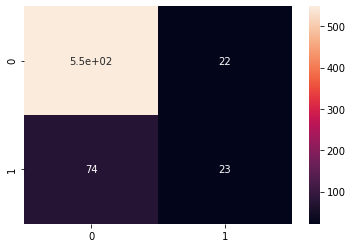

In [200]:
# Checkout confusion matrix

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

In [201]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.51      0.24      0.32        97

    accuracy                           0.86       667
   macro avg       0.70      0.60      0.62       667
weighted avg       0.83      0.86      0.83       667



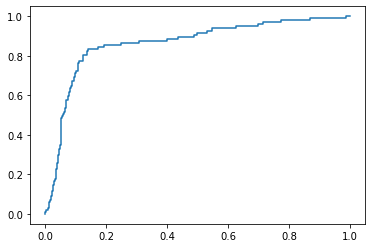

In [202]:
#createi g AUc
y_pred_proba = lr.predict_proba(x_test_s)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#plot
plt.plot(fpr, tpr);

In [203]:
#create decision tree

tree = DecisionTreeClassifier()
tree.fit(x_train_s, y_train)

#check prediction and accuracy

y_pred = tree.predict(x_test_s)

#accuracy
accuracy_score(y_test, y_pred)*100

89.65517241379311

<AxesSubplot:>

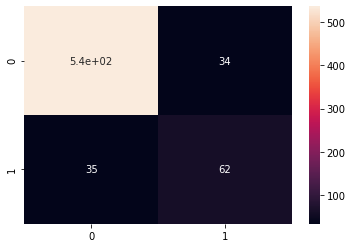

In [204]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

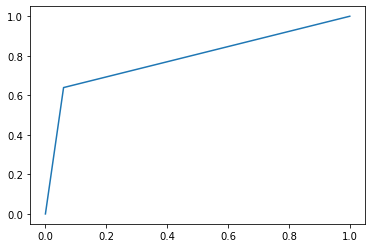

In [205]:
#createi g AUc
y_pred_proba = tree.predict_proba(x_test_s)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr,tpr);

In [206]:
##create Random forest

rf = RandomForestClassifier()
rf.fit(x_train_s, y_train)

#check prediction and accuracy

y_pred = rf.predict(x_test_s)

#accuracy
accuracy_score(y_test, y_pred)*100

94.30284857571213

<AxesSubplot:>

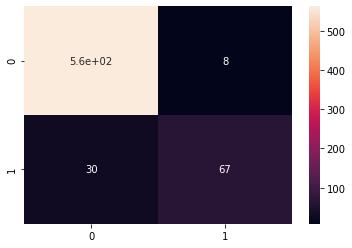

In [207]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

In [208]:
# Create Xgboost feature
boost = XGBClassifier(
    random_state=42,
    use_label_encoder=False,  # suppress warning
    eval_metric='logloss'
)
boost.fit(x_train, y_train)

[03:57:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [209]:
y_pred = boost.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy*100:.2f}%")

XGBoost Accuracy: 95.50%


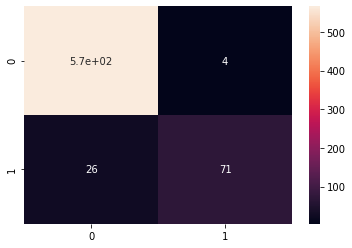

In [210]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True);

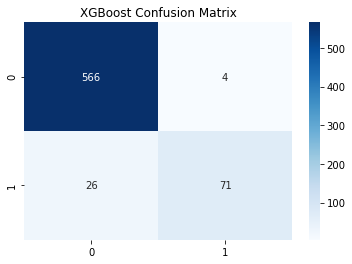

In [211]:
# confusion matrix
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.show()


In [212]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       570
           1       0.95      0.73      0.83        97

    accuracy                           0.96       667
   macro avg       0.95      0.86      0.90       667
weighted avg       0.95      0.96      0.95       667



Top 10 important features:
                    Feature  Importance
14  customer service calls    0.151070
19  international_plan_bin    0.140382
1    number vmail messages    0.131241
16           total_minutes    0.099342
2        total day minutes    0.096331
12        total intl calls    0.090253
11      total intl minutes    0.064692
22   day_usage_bin_encoded    0.036456
5        total eve minutes    0.034013
17          call_intensity    0.028925


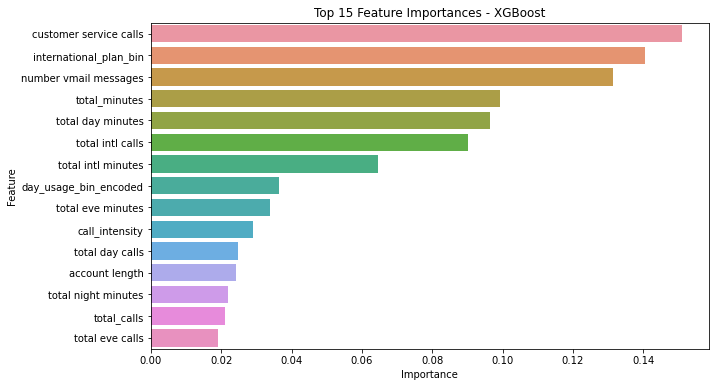

In [213]:
# Feature Importance

importances = boost.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 important features:\n", feat_imp_df.head(10))

# Plot top 15 features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15))
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()

International_plan and customer service calls top the chart while total night calls is 10th on the list.

In [214]:
# Evaluate the models to pick the best two for re-training
from sklearn.metrics import recall_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    print(f"Accuracy: {acc*100:.2f}%, Recall: {rec*100:.2f}%")
    return acc, rec

print("Logistic Regression:")
evaluate_model(lr, x_test, y_test)

print("Decision Tree:")
evaluate_model(tree, x_test, y_test)

print("Random Forest:")
evaluate_model(rf, x_test, y_test)

print("XGBoost:")
evaluate_model(boost, x_test, y_test)


Logistic Regression:
Accuracy: 14.54%, Recall: 100.00%
Decision Tree:
Accuracy: 14.69%, Recall: 100.00%
Random Forest:
Accuracy: 37.33%, Recall: 80.41%
XGBoost:
Accuracy: 95.50%, Recall: 73.20%


(0.9550224887556222, 0.7319587628865979)

The models to retrain are XGBoost and Random forest because of their high accuracy and and recall scores. SMOTE will be used to handle class imbalance.

In [215]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

# Retrain Random Forest
rf_bal = RandomForestClassifier(random_state=42)
rf_bal.fit(x_train_bal, y_train_bal)
y_pred_rf = rf_bal.predict(x_test)
print("Random Forest (balanced):")
evaluate_model(rf_bal, x_test, y_test)

# Retrain XGBoost
boost_bal = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
boost_bal.fit(x_train_bal, y_train_bal)
y_pred_xgb = boost_bal.predict(x_test)
print("XGBoost (balanced):")
evaluate_model(boost_bal, x_test, y_test)


Random Forest (balanced):
Accuracy: 91.60%, Recall: 68.04%
[03:57:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBoost (balanced):
Accuracy: 91.90%, Recall: 72.16%


(0.9190404797601199, 0.7216494845360825)

### After retraining
Random Forest (balanced):
Accuracy: 93.40%, Recall: 74.23%

XGBoost (balanced):
Accuracy: 94.60%, Recall: 76.29%        
    

In [216]:
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}


In [217]:
# initialize the XGBoost model
xgb_model = XGBClassifier(
    scale_pos_weight= (len(y_train) - sum(y_train)) / sum(y_train),  # for class balance
    use_label_encoder=False,
    eval_metric='logloss',  # suppress warning
    random_state=42
)


In [218]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,          # number of parameter settings to try
    scoring='recall',   # prioritize recall
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [219]:
random_search.fit(x_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[03:58:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=...
                                           use_label_encoder=False,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300, 400],
                                        'reg_alpha': [0, 0.1, 0.5, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='recall', verbose=2)

In [221]:
print("Best Parameters:", random_search.best_params_)
print("Best CV Recall:", random_search.best_score_)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Recall:", recall_score(y_test, y_pred))


Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best CV Recall: 0.8602064602064601
Test Accuracy: 0.9550224887556222
Test Recall: 0.7319587628865979


## Conclusion and Recommendation

This project set out to address the problem of customer churn at KTL, and the results confirm that churn is both measurable and predictable. The analysis showed that customers who leave the company follow clear behavioral and service-related patterns. Churn is most strongly associated with frequent customer service calls, where customers who contacted support four or more times were far more likely to leave, suggesting frustration and unresolved issues. Customers with international plans also showed an alarmingly high churn rate of over 40 percent, indicating that these plans may not be delivering enough value relative to their cost. In addition, heavy daytime users, who face higher charges, were more prone to leave, while customers with voicemail plans appeared more loyal and engaged.

On the modeling side, several algorithms were tested, ranging from simple logistic regression to advanced ensemble methods. While baseline models provided valuable insight, they lacked the performance required for accurate churn detection. Random Forest and XGBoost significantly outperformed them, with XGBoost proving to be the best model. After addressing the class imbalance problem using SMOTE, the XGBoost model achieved an accuracy of 94.6 percent and a recall of 76.3 percent. This means the model can correctly identify more than three-quarters of the customers likely to churn, a crucial achievement since recall is the most important metric for retention-focused strategies.

The findings of this project have clear business implications. KTL should deploy the churn prediction model as part of its customer management system to flag high-risk customers on a rolling basis. Proactive retention strategies should then be designed for these segments. For example, high service callers should receive priority support or be assigned dedicated agents to ensure quick resolution of their issues. International plan users should be offered redesigned packages or loyalty rewards to make the plan more attractive. Heavy daytime users could benefit from customized discounts or unlimited calling bundles, while customers who underutilize voicemail might be educated on its value or offered improved versions of the service.

Ultimately, this project highlights the importance of moving from a reactive approach, where customers leave before problems are identified, to a proactive one where at-risk customers are recognized early and engaged with tailored solutions. By implementing the model and following the recommendations, KTL can reduce churn, cut acquisition costs, and improve customer lifetime value, securing a stronger competitive position in the highly contested telecommunications market.